In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# load datasets 
train = pd.read_csv('train_features.csv')
test = pd.read_csv('test_features.csv')

train['dataset'] = 'train'
test['dataset'] = 'test'

# join together for EDA
df = pd.concat([train, test])

In [3]:
train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,dataset
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,train
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,train
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,train
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,train
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,train


In [4]:
print('Number of rows in training set:', train.shape[0])
print('Number of columns in training set:', train.shape[1] - 1)

print('Number of rows in test set:', test.shape[0])
print('Number of columns in test set:', test.shape[1] - 1)

Number of rows in training set: 23814
Number of columns in training set: 876
Number of rows in test set: 3982
Number of columns in test set: 876


In [5]:
df.info()

# 877 features? Need to explore

<class 'pandas.core.frame.DataFrame'>
Index: 27796 entries, 0 to 3981
Columns: 877 entries, sig_id to dataset
dtypes: float64(872), int64(1), object(4)
memory usage: 186.2+ MB


In [6]:
cp_width = 500
cp_height = 400
scatter_size = 600
WIDTH=800


ds = df.groupby(['cp_type', 'dataset'])['sig_id'].count().reset_index()

ds.columns = [
    'cp_type', 
    'dataset', 
    'count'
]

fig = px.bar(
    ds, 
    x='cp_type', 
    y="count", 
    color='dataset',
    barmode='group',
    orientation='v', 
    title='cp_type train/test counts', 
    width=cp_width,
    height=cp_height
)

fig.show()

In [7]:
ds = df.groupby(['cp_time', 'dataset'])['sig_id'].count().reset_index()

ds.columns = [
    'cp_time', 
    'dataset', 
    'count'
]

fig = px.bar(
    ds, 
    x='cp_time', 
    y="count", 
    color='dataset',
    barmode='group',
    orientation='v', 
    title='cp_time train/test counts', 
    width=cp_width,
    height=cp_height
)

fig.show()

In [8]:
ds = df.groupby(['cp_dose', 'dataset'])['sig_id'].count().reset_index()

ds.columns = ['cp_dose', 'dataset','count']

fig = px.bar(ds, x='cp_dose', y="count", color='dataset',barmode='group',orientation='v', title='cp_dose train/test counts', width=cp_width,height=cp_height)

fig

In [9]:
ds = df[df['dataset']=='train']
ds = ds.groupby(['cp_type', 'cp_time', 'cp_dose'])['sig_id'].count().reset_index()

ds.columns = ['cp_type', 'cp_time', 'cp_dose', 'count']

fig = px.sunburst(ds, path=['cp_type','cp_time','cp_dose'], values='count', title='Sunburst chart for all cp_type/cp_time/cp_dose', width=500,height=500)

fig


C:\Users\Chris\AppData\Local\Temp\ipykernel_5500\750768086.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Chris\AppData\Local\Temp\ipykernel_5500\750768086.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




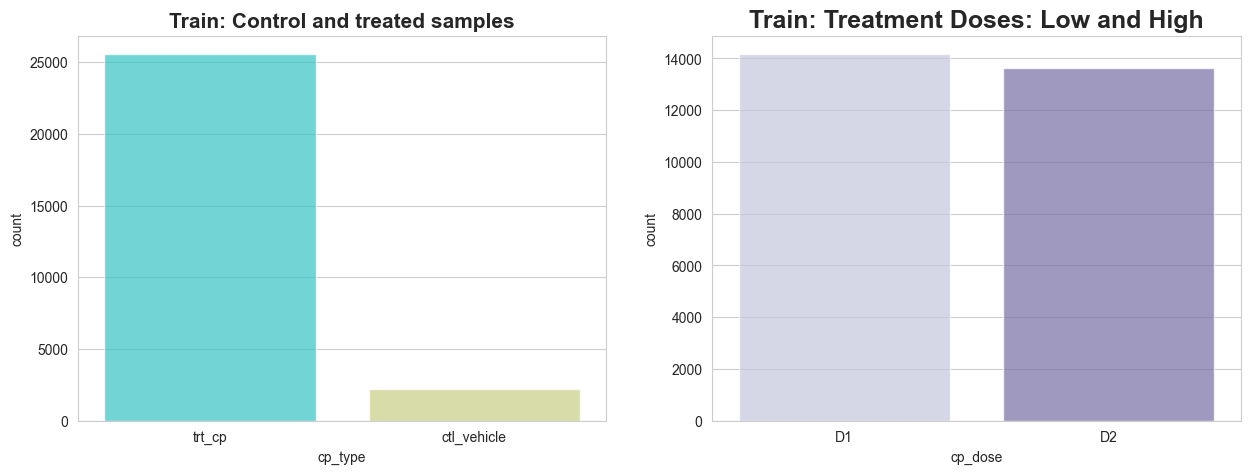

In [10]:
# a slightly different way to visualise the data (same as above)
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,5))
#1 rows 2 cols
#first row, first col
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x='cp_type', data=df, palette='rainbow', alpha=0.75)
plt.title('Train: Control and treated samples', fontsize=15, weight='bold')
#first row sec col
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x='cp_dose', data=df, palette='Purples', alpha=0.75)
plt.title('Train: Treatment Doses: Low and High',weight='bold', fontsize=18)
plt.show()